## Demand and Supply analysis for uber

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
pio.templates.default = "plotly_white"
data = pd.read_csv('Uber Request Data.csv')
print(data.head())

## Cheking null values in our data set

In [50]:
print(data.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


## cheking number of our records

In [51]:
rows=data.shape[0]
columns=data.shape[1]
print(rows)
print(columns)



6745
6


## Cheking basic information about our data set

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## How many trips were completed and cancelled

In [53]:
data.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

## Rename columns for easy manipulation

In [54]:
## first we rename columns in the data set
newData=data.rename(columns={'Request id': 'Request_id', 'Driver id': 'Driver_id','Pickup point':'Pickup_point',
                             'Request timestamp':'Request_timestamp','Drop timestamp':'Drop_timestamp','Status':'status'})
newData.head()

,Request_id,Pickup_point,Driver_id,status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Number of driver and average tips in our data set

In [55]:
# rideNum=newData.groupby('Driver_id')['Request_id'].nunique() 
# print(rideNum)
# creating a small dataframe to identify the number of drivers and average trip they complete daily
demand_vs_supply = pd.DataFrame({'Total No. of Drivers':[newData['Driver_id'].nunique()], 
                                 'Total Demand Per Day':[newData['Request_id'].nunique()/5],
                                 'Trip_Completed_Count_Per_Day':newData[(newData['status']=='Trip Completed')].shape[0]/5,
                                 ' Trip_cancelled_count_per_day' :newData[newData['status']=='Cancelled'].shape[0]/5})
                                 
demand_vs_supply


,Total No. of Drivers,Total Demand Per Day,Trip_Completed_Count_Per_Day,Trip_cancelled_count_per_day
0,300,1349.0,566.2,252.8



## On average how many request each driver gets per day

In [59]:
# on average how many request each driver gets
demand_vs_supply['Total Demand Per Day']/demand_vs_supply['Total No. of Drivers']

0    4.496667
dtype: float64

## The driver with the highest number of rides

In [60]:
rideNum=newData.groupby('Driver_id')['Request_id'].nunique() 
print(rideNum.max())

22


## The driver with the lowest number of rides

In [61]:
rideNum=newData.groupby('Driver_id')['Request_id'].nunique() 
print(rideNum.min())

6


## Where did most pickup occur

Pickuo point:
 City       3507
Airport    3238
Name: Pickup_point, dtype: int64
Percantage as per drop: 
 City       52.0
Airport    48.0
Name: Pickup_point, dtype: float64


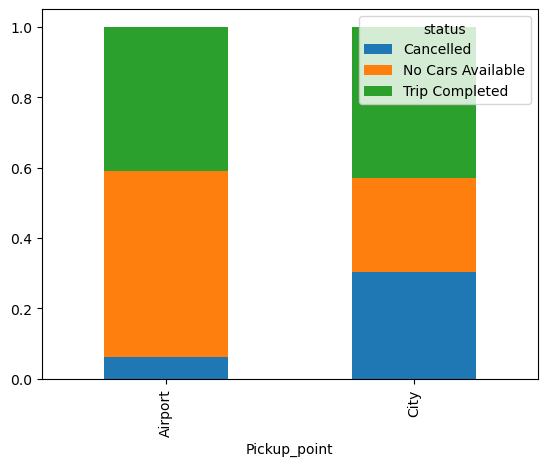

In [64]:
print("Pickuo point:\n", newData.Pickup_point.value_counts())
## percentage of camplete, cancelled and not not availble trips in each pick point
print("Percantage as per drop: \n", round(newData.Pickup_point.value_counts()/newData.Pickup_point.size*100,1))
newData.groupby(by=['Pickup_point'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

## Changing pickup and drop time to date format for easy analysis

In [65]:
newData['Request_timestamp'] = pd.to_datetime(newData['Request_timestamp'],
                                       errors='coerce')
newData['Drop_timestamp'] = pd.to_datetime(newData['Drop_timestamp'],
                                     errors='coerce')
newData.head()

,Request_id,Pickup_point,Driver_id,status,Request_timestamp,Drop_timestamp,Request_month,Request_date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2016-07-13


## Splitting the Reuest time to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [71]:
from datetime import datetime

newData['Request_month'] = pd.DatetimeIndex(newData['Request_timestamp']).month
newData['Request_date'] = pd.DatetimeIndex(newData['Request_timestamp']).date
newData['Request_time'] = pd.DatetimeIndex(newData['Request_timestamp']).hour
 
#changing into categories of day and night
newData['day-night'] = pd.cut(x=newData['Request_time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])
newData.head()


,Request_id,Pickup_point,Driver_id,status,Request_timestamp,Drop_timestamp,Request_month,Request_date,Request_time,day-night
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07,11,Afternoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,2016-11-07,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2016-12-07,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2016-12-07,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2016-07-13,8,Morning


## counting number of null values  in request timestamp, drop timestamp and driver id

In [72]:
Request_timestamp_count_of_null_values = newData['Request_timestamp'].isnull().sum()
Drop_timestamp_count_of_null_values = newData['Drop_timestamp'].isnull().sum()
Driver_id_count_of_null_values = newData['Driver_id'].isnull().sum()
print("Number of rows containing null values in Request timestamp:", Request_timestamp_count_of_null_values)
print("Number of rows containing null values in Drop timestamp:", Drop_timestamp_count_of_null_values)
print("Number of rows containing null values in Driver id:", Driver_id_count_of_null_values)

Number of rows containing null values in Request timestamp: 0
Number of rows containing null values in Drop timestamp: 3914
Number of rows containing null values in Driver id: 2650


## Grouping data by status
 

In [74]:
newData.groupby(newData.status).count()

,Request_id,Pickup_point,Driver_id,Request_timestamp,Drop_timestamp,Request_month,Request_date,Request_time,day-night
status,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,1264,1261
No Cars Available,2650,2650,0,2650,0,2650,2650,2650,2594
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2791


## Cheking the range of dates for the data given

In [77]:
print("Minimum Date: ", min(newData['Request_date']))
print("Maximum Date: ", max(newData['Request_date']))

Minimum Date:  2016-07-13
Maximum Date:  2016-12-07


## Printing all unique dates

In [79]:
print(newData['Request_date'].unique())

[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


##  grouping by driver id and status type and printing top 10 rows

In [82]:
newData_groupby_status_and_driverId = newData.groupby(["Driver_id","status"]).count()
newData_groupby_status_and_driverId.head(10)

Request_id  Pickup_point  Request_timestamp  \
Driver_id status                                                        
1.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
2.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
3.0       Cancelled                4             4                  4   
          Trip Completed          10            10                 10   
4.0       Cancelled                5             5                  5   
          Trip Completed          10            10                 10   
5.0       Cancelled                2             2                  2   
          Trip Completed          11            11                 11   

                          Drop_timestamp  Request_month  Request_date  \
Driver_id status                                                        
1.0       Cancelled                    0              4             4   
          Trip Completed               9              9             9   
2.0       Cancelled                    0              4             4   
          Trip Completed               9              9             9   
3.0       Cancelled                    0              4             4   
          Trip Completed              10             10            10   
4.0       Cancelled                    0              5             5   
          Trip Completed              10             10            10   
5.0       Cancelled                    0              2             2   
          Trip Completed              11             11            11   

                          Request_time  day-night  
Driver_id status                                   
1.0       Cancelled                  4          4  
          Trip Completed             9          9  
2.0       Cancelled                  4          4  
          Trip Completed             9          9  
3.0       Cancelled                  4          4  
          Trip Completed            10         10  
4.0       Cancelled                  5          5  
          Trip Completed            10         10  
5.0       Cancelled                  2          2  
          Trip Completed            11         11

## filtering the dataframe for which trip is either cancelled or no cab was available

In [85]:
newdata_with_null_drop_timestamp = newData[newData["Drop_timestamp"].isnull()]
newdata_with_null_drop_timestamp.head()

,Request_id,Pickup_point,Driver_id,status,Request_timestamp,Drop_timestamp,Request_month,Request_date,Request_time,day-night
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,7,2016-07-13,6,Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,7,2016-07-14,17,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,7,2016-07-14,20,Night
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,7,2016-07-15,10,Morning
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,12,2016-12-07,19,Evening


## Percentage of completed , cancelled and not available trips

Total trips:  6745
Trip Completed       42.0
No Cars Available    39.3
Cancelled            18.7
Name: Status, dtype: float64


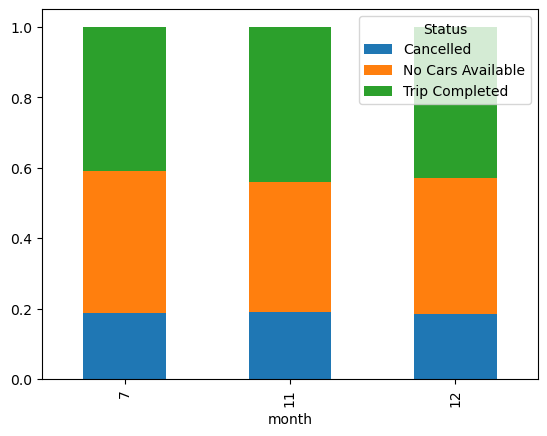

In [16]:
print('Total trips: ', newData.Status.count())
print(round(newData.Status.value_counts()/newData.Status.size*100,1))

newData.groupby(by=['month'])['Status'].value_counts(normalize=True).unstack('Status').plot.bar(stacked=True);


## Time taken by each ride


In [84]:
newData['Time-diff']=newData['Drop_timestamp'] -newData['Request_timestamp']
newData['Time-diff']=newData['Time-diff'].apply(lambda x: round(x.total_seconds()/60,1))
newData.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,month,date,time,day-night,Time-diff
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07,11,Afternoon,69.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,2016-11-07,17,Evening,50.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2016-12-07,9,Morning,41.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2016-12-07,21,Night,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2016-07-13,8,Morning,52.5


## Which weekdays had the highest rides?

C:\Users\mr bones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

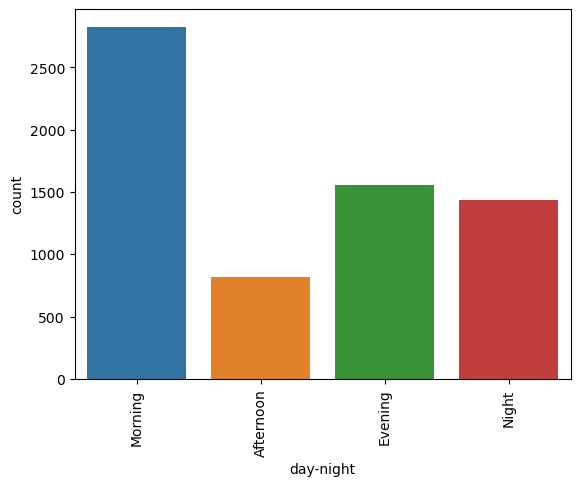

In [17]:
sns.countplot(newData['day-night'])
plt.xticks(rotation=90)

## Which pickup point has the highest rides in a weekday

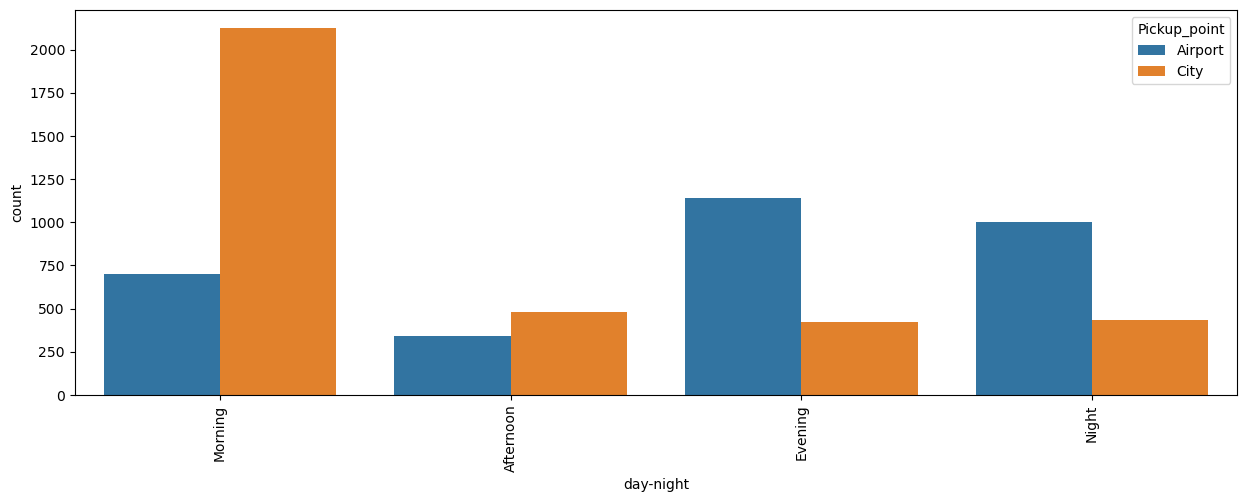

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(data=newData, x='day-night', hue='Pickup_point')
plt.xticks(rotation=90)
plt.show()

## checking the relation of trip status and the pickup point

In [19]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['Status', 'Pickup_point']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(newData[object_cols]))
OH_cols.index = newData.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = newData.drop(object_cols, axis=1)
newData = pd.concat([df_final, OH_cols], axis=1)

C:\Users\mr bones\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

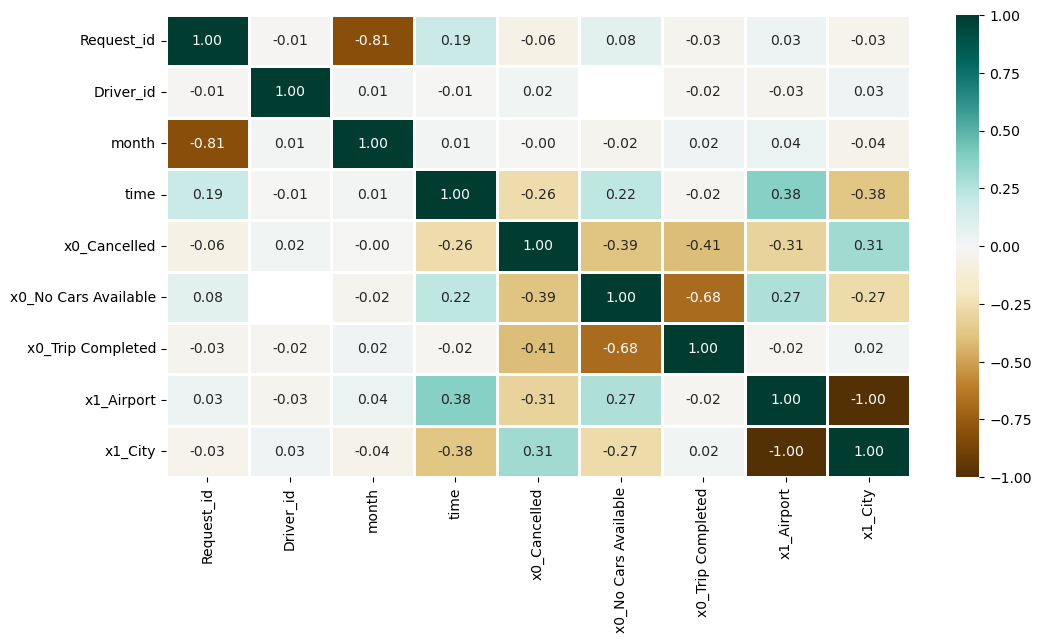

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(newData.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

## Supply graph

In [1]:
#plot data to show demand supply gap
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
newData.groupby(newData['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
newData[newData['Status']=="Trip Completed"].groupby(newData[newData['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(newData.groupby(newData['Request Hour']).count()['Request id'] - newData[newData['Status']=="Trip Completed"].groupby(newData[newData['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

NameError: name 'plt' is not defined